<a href="https://colab.research.google.com/github/FernandaSzAdr/KNN_cromossome/blob/master/TesteRedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.4 GB  | Proc size: 665.3 MB
GPU RAM Free: 11325MB | Used: 116MB | Util   1% | Total 11441MB


In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
train_path = 'drive/My Drive/Base_CNN/Colorido/Train'
test_path = 'drive/My Drive/Base_CNN/Colorido/Test'
validation_path = 'drive/My Drive/Base_CNN/Colorido/Validation'



---



## Implementação



*   Batch size = 32
*   Image size = 120x120



In [0]:
results = {}

In [0]:
bSize = 32

In [0]:
datagen = ImageDataGenerator(rescale=1/255.)

In [7]:
train_batches = datagen.flow_from_directory(train_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)
test_batches = datagen.flow_from_directory(test_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)
validation_batches = datagen.flow_from_directory(validation_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)

Found 4276 images belonging to 2 classes.
Found 1336 images belonging to 2 classes.
Found 1068 images belonging to 2 classes.


In [0]:
stepsPerEpoche = len(train_batches)/bSize
validationSteps = len(validation_batches)/bSize

In [0]:
test_batches.class_indices

{'C': 0, 'NC': 1}



---



### 1 tentativa Accuracy: 50.20%


**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"



In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(1024, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_1.hdf5', verbose=1, save_best_only=True)

In [12]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 94s - loss: 0.6995 - acc: 0.4750 - val_loss: 0.6667 - val_acc: 0.6250

Epoch 00001: val_loss improved from inf to 0.66674, saving model to weights_architecture_1.hdf5
Epoch 2/50
 - 92s - loss: 0.7057 - acc: 0.4875 - val_loss: 0.6854 - val_acc: 0.5625

Epoch 00002: val_loss did not improve from 0.66674
Epoch 3/50
 - 92s - loss: 0.7142 - acc: 0.4625 - val_loss: 0.7230 - val_acc: 0.4531

Epoch 00003: val_loss did not improve from 0.66674
Epoch 4/50
 - 90s - loss: 0.7067 - acc: 0.4438 - val_loss: 0.7593 - val_acc: 0.3750

Epoch 00004: val_loss did not improve from 0.66674
Epoch 5/50
 - 97s - loss: 0.7019 - acc: 0.5250 - val_loss: 0.6821 - val_acc: 0.5781

Epoch 00005: val_loss did not improve from 0.66674
Epoch 6/50
 - 97s - loss: 0.7132 - acc: 0.4688 - val_loss: 0.6959 - val_acc: 0.4219

Epoch 00006: val_loss did not improve from 0.66674
Epoch 7/50
 - 90s - loss: 0.6957 - acc: 0.5687 - val_loss: 0.6835 - val_acc: 0.5781

Epoch 00007: val_loss did not improve from 0.66674
Epo

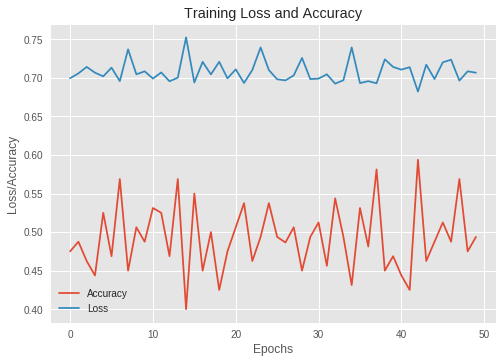

In [13]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_1.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_1.hdf5')

In [15]:
results['architecture_1'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 573s 18s/step


In [16]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_1'][0], 100 * results['architecture_1'][1]))

Test Loss: 0.7039440330117941 | Test Accuracy: 50.20%




---



### 2 tentativa Accuracy: 87.50%

**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"
*   Alteração nas duas ultimas camadas Dense





In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_2.hdf5', verbose=1, save_best_only=True)

In [20]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 2s - loss: 0.6937 - acc: 0.5000 - val_loss: 0.6933 - val_acc: 0.4688

Epoch 00001: val_loss improved from inf to 0.69334, saving model to weights_architecture_2.hdf5
Epoch 2/50
 - 1s - loss: 0.6936 - acc: 0.4999 - val_loss: 0.6932 - val_acc: 0.4844

Epoch 00002: val_loss improved from 0.69334 to 0.69324, saving model to weights_architecture_2.hdf5
Epoch 3/50
 - 1s - loss: 0.6936 - acc: 0.4562 - val_loss: 0.6933 - val_acc: 0.4844

Epoch 00003: val_loss did not improve from 0.69324
Epoch 4/50
 - 1s - loss: 0.6936 - acc: 0.5062 - val_loss: 0.6932 - val_acc: 0.5156

Epoch 00004: val_loss improved from 0.69324 to 0.69317, saving model to weights_architecture_2.hdf5
Epoch 5/50
 - 1s - loss: 0.6936 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4688

Epoch 00005: val_loss did not improve from 0.69317
Epoch 6/50
 - 1s - loss: 0.6933 - acc: 0.5187 - val_loss: 0.6931 - val_acc: 0.5000

Epoch 00006: val_loss improved from 0.69317 to 0.69312, saving model to weights_architecture_2.hdf

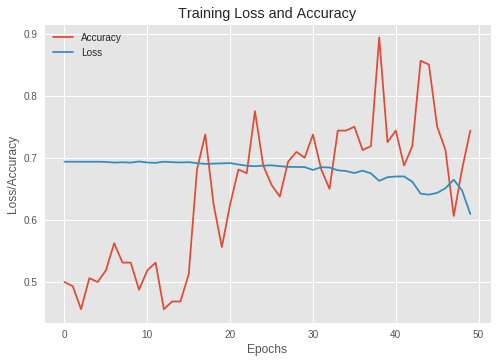

In [21]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_2.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_2.hdf5')

In [23]:
results['architecture_2'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 64s 2s/step


In [24]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_2'][0], 100 * results['architecture_2'][1]))

Test Loss: 0.6306499112397432 | Test Accuracy: 87.50%


### 3 tentativa Accuracy: 92.87%

Modelo criado pelo **Lucas Valentim**

https://github.com/lucasvalentim/chromosome-recognizer/blob/master/chromosome_recognizer.ipynb

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_3.hdf5', verbose=1, save_best_only=True)

In [28]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 1.1374 - acc: 0.5938 - val_loss: 0.4250 - val_acc: 0.8750

Epoch 00001: val_loss improved from inf to 0.42496, saving model to weights_architecture_3.hdf5
Epoch 2/50
 - 1s - loss: 0.8151 - acc: 0.7250 - val_loss: 0.6050 - val_acc: 0.7969

Epoch 00002: val_loss did not improve from 0.42496
Epoch 3/50
 - 1s - loss: 0.6233 - acc: 0.8031 - val_loss: 1.3997 - val_acc: 0.6250

Epoch 00003: val_loss did not improve from 0.42496
Epoch 4/50
 - 1s - loss: 0.4981 - acc: 0.8406 - val_loss: 0.5188 - val_acc: 0.8281

Epoch 00004: val_loss did not improve from 0.42496
Epoch 5/50
 - 1s - loss: 0.5567 - acc: 0.8228 - val_loss: 0.4902 - val_acc: 0.8828

Epoch 00005: val_loss did not improve from 0.42496
Epoch 6/50
 - 1s - loss: 0.4846 - acc: 0.8281 - val_loss: 0.2996 - val_acc: 0.9219

Epoch 00006: val_loss improved from 0.42496 to 0.29957, saving model to weights_architecture_3.hdf5
Epoch 7/50
 - 1s - loss: 0.3127 - acc: 0.8906 - val_loss: 0.7233 - val_acc: 0.6953

Epoch 00007:

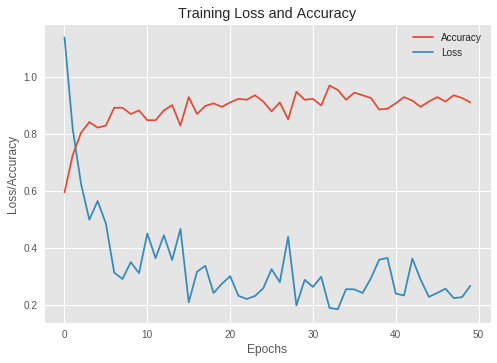

In [29]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_3.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_3.hdf5')

In [31]:
results['architecture_3'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 109ms/step


In [32]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_3'][0], 100 * results['architecture_3'][1]))

Test Loss: 0.25643043126910925 | Test Accuracy: 92.87%


### 4 tentativa Accuracy: 94.53%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_4.hdf5', verbose=1, save_best_only=True)

In [36]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 0.6828 - acc: 0.7094 - val_loss: 0.8983 - val_acc: 0.7031

Epoch 00001: val_loss improved from inf to 0.89833, saving model to weights_architecture_4.hdf5
Epoch 2/50
 - 1s - loss: 0.4376 - acc: 0.8500 - val_loss: 1.1364 - val_acc: 0.6484

Epoch 00002: val_loss did not improve from 0.89833
Epoch 3/50
 - 0s - loss: 0.3703 - acc: 0.8781 - val_loss: 0.6751 - val_acc: 0.7578

Epoch 00003: val_loss improved from 0.89833 to 0.67512, saving model to weights_architecture_4.hdf5
Epoch 4/50
 - 1s - loss: 0.3188 - acc: 0.8750 - val_loss: 0.6540 - val_acc: 0.7891

Epoch 00004: val_loss improved from 0.67512 to 0.65398, saving model to weights_architecture_4.hdf5
Epoch 5/50
 - 0s - loss: 0.3378 - acc: 0.8844 - val_loss: 0.3511 - val_acc: 0.8409

Epoch 00005: val_loss improved from 0.65398 to 0.35109, saving model to weights_architecture_4.hdf5
Epoch 6/50
 - 1s - loss: 0.2575 - acc: 0.9125 - val_loss: 0.4643 - val_acc: 0.8672

Epoch 00006: val_loss did not improve from 0.3510

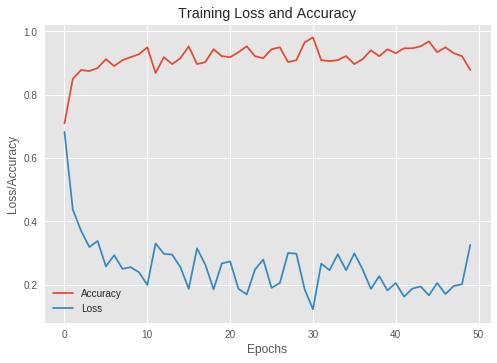

In [37]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_4.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_4.hdf5')

In [39]:
results['architecture_4'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 106ms/step


In [40]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_4'][0], 100 * results['architecture_4'][1]))

Test Loss: 0.20258343312889338 | Test Accuracy: 94.53%


### 5 tentativa Accuracy: 89.94%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_5.hdf5', verbose=1, save_best_only=True)

In [44]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 1.5031 - acc: 0.5438 - val_loss: 0.7441 - val_acc: 0.5795

Epoch 00001: val_loss improved from inf to 0.74407, saving model to weights_architecture_5.hdf5
Epoch 2/50
 - 0s - loss: 0.9128 - acc: 0.6156 - val_loss: 0.7321 - val_acc: 0.6016

Epoch 00002: val_loss improved from 0.74407 to 0.73212, saving model to weights_architecture_5.hdf5
Epoch 3/50
 - 0s - loss: 0.7819 - acc: 0.6844 - val_loss: 0.7490 - val_acc: 0.6016

Epoch 00003: val_loss did not improve from 0.73212
Epoch 4/50
 - 0s - loss: 0.6477 - acc: 0.7500 - val_loss: 0.4408 - val_acc: 0.8047

Epoch 00004: val_loss improved from 0.73212 to 0.44079, saving model to weights_architecture_5.hdf5
Epoch 5/50
 - 0s - loss: 0.6473 - acc: 0.7625 - val_loss: 0.6337 - val_acc: 0.7109

Epoch 00005: val_loss did not improve from 0.44079
Epoch 6/50
 - 0s - loss: 0.4703 - acc: 0.8187 - val_loss: 0.5136 - val_acc: 0.8047

Epoch 00006: val_loss did not improve from 0.44079
Epoch 7/50
 - 1s - loss: 0.5850 - acc: 0.7719 -

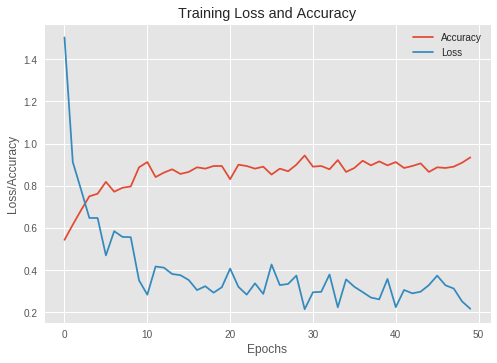

In [45]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_5.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_5.hdf5')

In [47]:
results['architecture_5'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 108ms/step


In [48]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_5'][0], 100 * results['architecture_5'][1]))

Test Loss: 0.33731238543987274 | Test Accuracy: 89.94%


### 6 tentativa Accuracy: 93.16%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_6.hdf5', verbose=1, save_best_only=True)

In [52]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 0.7671 - acc: 0.6375 - val_loss: 1.2500 - val_acc: 0.5781

Epoch 00001: val_loss improved from inf to 1.24997, saving model to weights_architecture_6.hdf5
Epoch 2/50
 - 0s - loss: 0.3926 - acc: 0.8844 - val_loss: 0.6023 - val_acc: 0.7500

Epoch 00002: val_loss improved from 1.24997 to 0.60234, saving model to weights_architecture_6.hdf5
Epoch 3/50
 - 0s - loss: 0.4375 - acc: 0.8406 - val_loss: 0.8043 - val_acc: 0.6875

Epoch 00003: val_loss did not improve from 0.60234
Epoch 4/50
 - 0s - loss: 0.3115 - acc: 0.8969 - val_loss: 0.6845 - val_acc: 0.7109

Epoch 00004: val_loss did not improve from 0.60234
Epoch 5/50
 - 0s - loss: 0.3667 - acc: 0.8469 - val_loss: 0.5136 - val_acc: 0.8516

Epoch 00005: val_loss improved from 0.60234 to 0.51357, saving model to weights_architecture_6.hdf5
Epoch 6/50
 - 0s - loss: 0.3736 - acc: 0.8656 - val_loss: 0.8194 - val_acc: 0.6094

Epoch 00006: val_loss did not improve from 0.51357
Epoch 7/50
 - 1s - loss: 0.4695 - acc: 0.8250 -

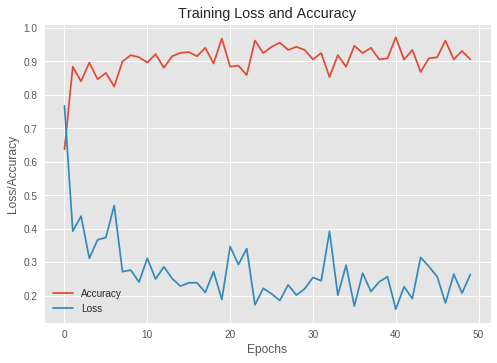

In [53]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_6.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_6.hdf5')

In [55]:
results['architecture_6'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 107ms/step


In [56]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_6'][0], 100 * results['architecture_6'][1]))

Test Loss: 0.22688628640025854 | Test Accuracy: 93.16%


### 7 tentativa Accuracy: 92.72%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **Adadelta** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_7.hdf5', verbose=1, save_best_only=True)

In [12]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 74s - loss: 0.6153 - acc: 0.6906 - val_loss: 1.7819 - val_acc: 0.4531

Epoch 00001: val_loss improved from inf to 1.78193, saving model to weights_architecture_7.hdf5
Epoch 2/50
 - 66s - loss: 0.4968 - acc: 0.8187 - val_loss: 1.0578 - val_acc: 0.4766

Epoch 00002: val_loss improved from 1.78193 to 1.05785, saving model to weights_architecture_7.hdf5
Epoch 3/50
 - 62s - loss: 0.4220 - acc: 0.8344 - val_loss: 1.1939 - val_acc: 0.6484

Epoch 00003: val_loss did not improve from 1.05785
Epoch 4/50
 - 58s - loss: 0.3527 - acc: 0.8906 - val_loss: 0.4557 - val_acc: 0.8516

Epoch 00004: val_loss improved from 1.05785 to 0.45571, saving model to weights_architecture_7.hdf5
Epoch 5/50
 - 59s - loss: 0.3204 - acc: 0.8875 - val_loss: 1.0031 - val_acc: 0.6719

Epoch 00005: val_loss did not improve from 0.45571
Epoch 6/50
 - 62s - loss: 0.2629 - acc: 0.9000 - val_loss: 0.5529 - val_acc: 0.7656

Epoch 00006: val_loss did not improve from 0.45571
Epoch 7/50
 - 59s - loss: 0.3756 - acc: 0

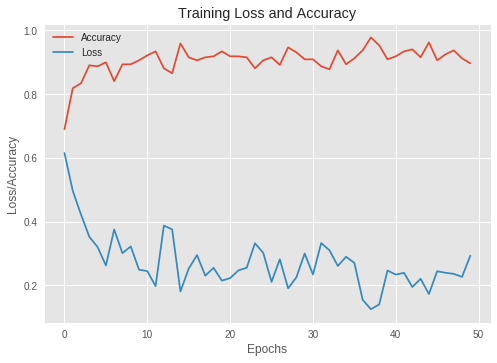

In [13]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_7.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_7.hdf5')

In [15]:
results['architecture_7'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 352s 11s/step


In [16]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_7'][0], 100 * results['architecture_7'][1]))

Test Loss: 0.2244592155329883 | Test Accuracy: 92.72%


### 8 tentativa Accuracy: 87.79%

Modelo adaptado do **Lucas Albertins**

*   Função **Adadelta** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_8.hdf5', verbose=1, save_best_only=True)

In [20]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 1.0651 - acc: 0.6562 - val_loss: 0.8945 - val_acc: 0.6719

Epoch 00001: val_loss improved from inf to 0.89452, saving model to weights_architecture_8.hdf5
Epoch 2/50
 - 1s - loss: 0.7159 - acc: 0.7625 - val_loss: 0.5161 - val_acc: 0.8125

Epoch 00002: val_loss improved from 0.89452 to 0.51606, saving model to weights_architecture_8.hdf5
Epoch 3/50
 - 1s - loss: 0.6157 - acc: 0.7844 - val_loss: 0.4118 - val_acc: 0.8203

Epoch 00003: val_loss improved from 0.51606 to 0.41182, saving model to weights_architecture_8.hdf5
Epoch 4/50
 - 1s - loss: 0.4913 - acc: 0.8402 - val_loss: 0.5272 - val_acc: 0.7266

Epoch 00004: val_loss did not improve from 0.41182
Epoch 5/50
 - 1s - loss: 0.5695 - acc: 0.7719 - val_loss: 0.7433 - val_acc: 0.6641

Epoch 00005: val_loss did not improve from 0.41182
Epoch 6/50
 - 1s - loss: 0.4062 - acc: 0.8469 - val_loss: 0.5129 - val_acc: 0.7969

Epoch 00006: val_loss did not improve from 0.41182
Epoch 7/50
 - 1s - loss: 0.3441 - acc: 0.8906 -

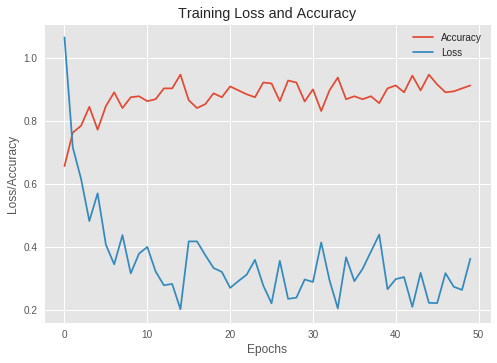

In [21]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_8.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_8.hdf5')

In [23]:
results['architecture_8'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 34s 1s/step


In [24]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_8'][0], 100 * results['architecture_8'][1]))

Test Loss: 0.3724281615577638 | Test Accuracy: 87.79%


### 9 tentativa Accuracy: 88.67%

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_9.hdf5', verbose=1, save_best_only=True)

In [28]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 1.4287 - acc: 0.5938 - val_loss: 0.5952 - val_acc: 0.8359

Epoch 00001: val_loss improved from inf to 0.59519, saving model to weights_architecture_9.hdf5
Epoch 2/50
 - 0s - loss: 0.9965 - acc: 0.7062 - val_loss: 0.6454 - val_acc: 0.6328

Epoch 00002: val_loss did not improve from 0.59519
Epoch 3/50
 - 0s - loss: 0.6175 - acc: 0.7438 - val_loss: 0.6154 - val_acc: 0.6719

Epoch 00003: val_loss did not improve from 0.59519
Epoch 4/50
 - 0s - loss: 0.3960 - acc: 0.8469 - val_loss: 0.3871 - val_acc: 0.8906

Epoch 00004: val_loss improved from 0.59519 to 0.38713, saving model to weights_architecture_9.hdf5
Epoch 5/50
 - 0s - loss: 0.5977 - acc: 0.8219 - val_loss: 0.4341 - val_acc: 0.8672

Epoch 00005: val_loss did not improve from 0.38713
Epoch 6/50
 - 0s - loss: 0.4357 - acc: 0.8250 - val_loss: 0.8468 - val_acc: 0.5234

Epoch 00006: val_loss did not improve from 0.38713
Epoch 7/50
 - 0s - loss: 0.4609 - acc: 0.8165 - val_loss: 0.5362 - val_acc: 0.7422

Epoch 00007:

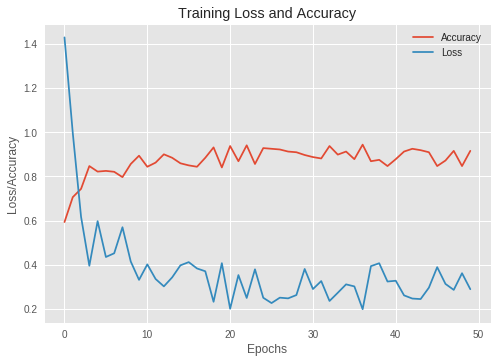

In [29]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_9.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_9.hdf5')

In [31]:
results['architecture_9'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 4s 110ms/step


In [32]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_9'][0], 100 * results['architecture_9'][1]))

Test Loss: 0.3758593238890171 | Test Accuracy: 88.67%


### 10 tentativa Accuracy: 94.04%

Modelo adaptado do **Lucas Albertins**

*   Função **adam** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_10.hdf5', verbose=1, save_best_only=True)

In [36]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 1.1370 - acc: 0.5812 - val_loss: 0.7932 - val_acc: 0.6172

Epoch 00001: val_loss improved from inf to 0.79322, saving model to weights_architecture_10.hdf5
Epoch 2/50
 - 1s - loss: 0.5673 - acc: 0.7938 - val_loss: 1.0158 - val_acc: 0.7109

Epoch 00002: val_loss did not improve from 0.79322
Epoch 3/50
 - 1s - loss: 0.4741 - acc: 0.8656 - val_loss: 0.6001 - val_acc: 0.7969

Epoch 00003: val_loss improved from 0.79322 to 0.60011, saving model to weights_architecture_10.hdf5
Epoch 4/50
 - 1s - loss: 0.3752 - acc: 0.8625 - val_loss: 0.4622 - val_acc: 0.8203

Epoch 00004: val_loss improved from 0.60011 to 0.46225, saving model to weights_architecture_10.hdf5
Epoch 5/50
 - 1s - loss: 0.2864 - acc: 0.9125 - val_loss: 0.4155 - val_acc: 0.8523

Epoch 00005: val_loss improved from 0.46225 to 0.41548, saving model to weights_architecture_10.hdf5
Epoch 6/50
 - 1s - loss: 0.3017 - acc: 0.9062 - val_loss: 0.3491 - val_acc: 0.8828

Epoch 00006: val_loss improved from 0.41548 t

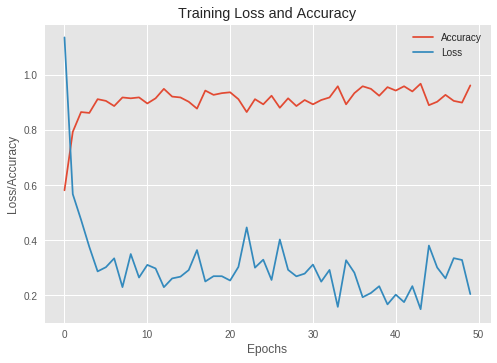

In [37]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_10.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_10.hdf5')

In [39]:
results['architecture_10'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 4s 110ms/step


In [40]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_10'][0], 100 * results['architecture_10'][1]))

Test Loss: 0.2183251641690731 | Test Accuracy: 94.04%


### 11 tentativa Accuracy: 90.92%

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_11.hdf5', verbose=1, save_best_only=True)

In [44]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 1.2068 - acc: 0.5750 - val_loss: 0.6299 - val_acc: 0.7273

Epoch 00001: val_loss improved from inf to 0.62989, saving model to weights_architecture_11.hdf5
Epoch 2/50
 - 1s - loss: 0.9031 - acc: 0.6500 - val_loss: 0.5859 - val_acc: 0.7891

Epoch 00002: val_loss improved from 0.62989 to 0.58592, saving model to weights_architecture_11.hdf5
Epoch 3/50
 - 1s - loss: 0.5377 - acc: 0.7875 - val_loss: 0.8772 - val_acc: 0.5781

Epoch 00003: val_loss did not improve from 0.58592
Epoch 4/50
 - 1s - loss: 0.4890 - acc: 0.8469 - val_loss: 0.3745 - val_acc: 0.9375

Epoch 00004: val_loss improved from 0.58592 to 0.37453, saving model to weights_architecture_11.hdf5
Epoch 5/50
 - 1s - loss: 0.5772 - acc: 0.8344 - val_loss: 0.5145 - val_acc: 0.7891

Epoch 00005: val_loss did not improve from 0.37453
Epoch 6/50
 - 1s - loss: 0.4413 - acc: 0.8469 - val_loss: 0.4145 - val_acc: 0.8359

Epoch 00006: val_loss did not improve from 0.37453
Epoch 7/50
 - 1s - loss: 0.4674 - acc: 0.859

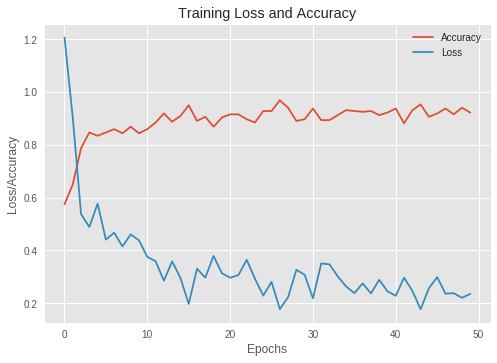

In [45]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_11.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_11.hdf5')

In [47]:
results['architecture_11'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 106ms/step


In [48]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_11'][0], 100 * results['architecture_11'][1]))

Test Loss: 0.2952674990519881 | Test Accuracy: 90.92%


### 12 tentativa Accuracy: 92.43%

Modelo adaptado do **Lucas Albertins**

*   Sem utilização das funções de regularização
*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_12.hdf5', verbose=1, save_best_only=True)

In [52]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 1.2021 - acc: 0.5750 - val_loss: 0.6111 - val_acc: 0.6953

Epoch 00001: val_loss improved from inf to 0.61105, saving model to weights_architecture_12.hdf5
Epoch 2/50
 - 1s - loss: 0.7221 - acc: 0.6906 - val_loss: 0.6066 - val_acc: 0.6953

Epoch 00002: val_loss improved from 0.61105 to 0.60656, saving model to weights_architecture_12.hdf5
Epoch 3/50
 - 1s - loss: 0.6948 - acc: 0.7219 - val_loss: 0.3532 - val_acc: 0.8125

Epoch 00003: val_loss improved from 0.60656 to 0.35317, saving model to weights_architecture_12.hdf5
Epoch 4/50
 - 1s - loss: 0.4190 - acc: 0.8344 - val_loss: 0.4618 - val_acc: 0.8594

Epoch 00004: val_loss did not improve from 0.35317
Epoch 5/50
 - 1s - loss: 0.3956 - acc: 0.8531 - val_loss: 0.3069 - val_acc: 0.9062

Epoch 00005: val_loss improved from 0.35317 to 0.30693, saving model to weights_architecture_12.hdf5
Epoch 6/50
 - 1s - loss: 0.4932 - acc: 0.8250 - val_loss: 1.5594 - val_acc: 0.5938

Epoch 00006: val_loss did not improve from 0.

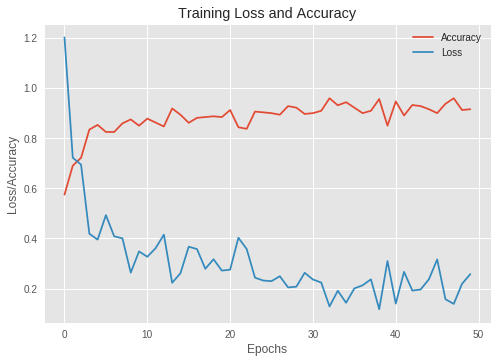

In [53]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_12.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_12.hdf5')

In [55]:
results['architecture_12'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 108ms/step


In [56]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_12'][0], 100 * results['architecture_12'][1]))

Test Loss: 0.2124328811187297 | Test Accuracy: 92.43%


### Graficos

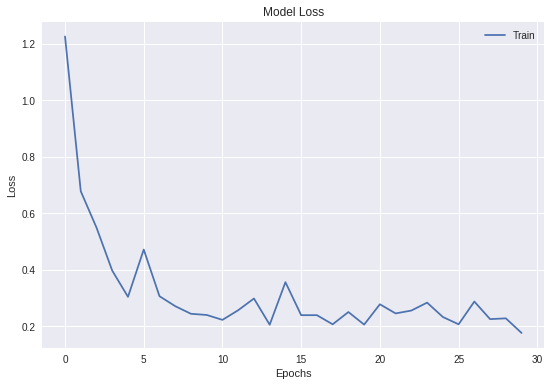

In [0]:
plt.figure(figsize=(9,6))
plt.plot(training.history['loss'], label='Train')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

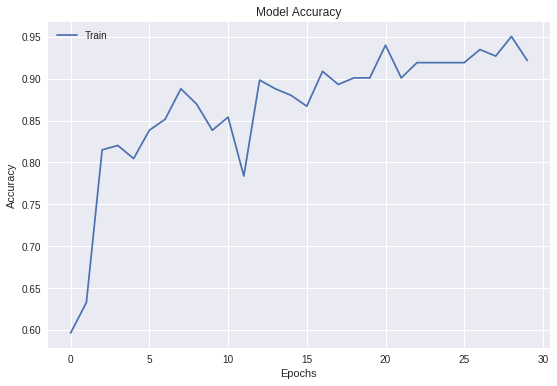

In [0]:
plt.figure(figsize=(9,6))
plt.plot(training.history['acc'], label='Train')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Implementação código do https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8

### 1 Teste

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



---



In [0]:
bSize = 16

In [0]:
datagen = ImageDataGenerator(rescale=1/255.)

In [0]:
train_batches = datagen.flow_from_directory(train_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)
test_batches = datagen.flow_from_directory(test_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)

Found 5344 images belonging to 2 classes.
Found 1336 images belonging to 2 classes.


In [0]:
stepsPerEpoche = len(train_batches)/bSize

In [0]:
model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                    epochs=5, verbose=2)


In [0]:
model.save_weights('25_epochs_exemplo2.h5')

In [0]:
model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                    epochs=50, verbose=2)

Epoch 1/50
 - 2s - loss: 0.7353 - acc: 0.4940
Epoch 2/50
 - 1s - loss: 0.6482 - acc: 0.6443
Epoch 3/50
 - 1s - loss: 0.5639 - acc: 0.7693
Epoch 4/50
 - 1s - loss: 0.5024 - acc: 0.7723
Epoch 5/50
 - 1s - loss: 0.4525 - acc: 0.7812
Epoch 6/50
 - 1s - loss: 0.3668 - acc: 0.8631
Epoch 7/50
 - 1s - loss: 0.3639 - acc: 0.8646
Epoch 8/50
 - 1s - loss: 0.3626 - acc: 0.8586
Epoch 9/50
 - 1s - loss: 0.3493 - acc: 0.8527
Epoch 10/50
 - 1s - loss: 0.2751 - acc: 0.8958
Epoch 11/50
 - 1s - loss: 0.4273 - acc: 0.8646
Epoch 12/50
 - 1s - loss: 0.3008 - acc: 0.9241
Epoch 13/50
 - 1s - loss: 0.3326 - acc: 0.8795
Epoch 14/50
 - 1s - loss: 0.2798 - acc: 0.8824
Epoch 15/50
 - 1s - loss: 0.3081 - acc: 0.8899
Epoch 16/50
 - 1s - loss: 0.3306 - acc: 0.8914
Epoch 17/50
 - 1s - loss: 0.3057 - acc: 0.8810
Epoch 18/50
 - 1s - loss: 0.2491 - acc: 0.9226
Epoch 19/50
 - 1s - loss: 0.2335 - acc: 0.9301
Epoch 20/50
 - 1s - loss: 0.3320 - acc: 0.9077
Epoch 21/50
 - 1s - loss: 0.2576 - acc: 0.9167
Epoch 22/50
 - 1s - lo

In [0]:
model.save_weights('50_epochs_exemplo2.h5')